In [1]:
import os
os.chdir(os.path.pardir)
from models.NMF import NMF_Model
from dataset.dataset import Dataset
from evaluation_metrics.diversity_metrics import Topic_diversity
from evaluation_metrics.coherence_metrics import Coherence_word_embeddings_pairwise
from evaluation_metrics.topic_significance_metrics import KL_uniform
from optimization.optimizer import Optimizer
from skopt.space.space import Real, Integer
import multiprocessing as mp
from gensim.models import Word2Vec

In [2]:
# Load dataset
dataset = Dataset()
dataset.load("preprocessed_datasets/newsgroup/newsgroup_lemmatized_10")

True

In [3]:
# Load model
model = NMF_Model(dataset)

In [ ]:
# Set model hyperparameters
model.set_hyperparameters({'num_topics':20})

In [4]:
# Define metrics to use

# Topic diversity
topic_diversity = Topic_diversity() 

# Topic diversity with 5 topk words
topic_diversity_5 = Topic_diversity({'topk':5})

# KL uniform
kl_uniform = KL_uniform()

# Coherence word embeddings pairwise
metric_params = {
    'topk':10,
    'w2v_model': Word2Vec(model.dataset.get_corpus())
}
c_we_p = Coherence_word_embeddings_pairwise(metric_params)

In [5]:
# Define optimization parameters
opt_params = {}
opt_params["n_calls"] = 30
opt_params["n_random_starts"] = 5
opt_params["extra_metrics"] = [kl_uniform, topic_diversity_5, c_we_p] # List of extra metrics
opt_params["n_jobs"] = mp.cpu_count() # Enable multiprocessing
opt_params["verbose"] = True

In [6]:
# Create search space for optimization
search_space = {
    "alpha": Real(low=0.001, high=5.0),
    "eta": Real(low=0.001, high=5.0)
}

In [7]:
# Initialize optimizer
optimizer = Optimizer(
    model,
    topic_diversity,
    search_space,
    opt_params)

In [8]:
# Disable computing of topic document matrix to optimize performance
optimizer.topic_document_matrix = False

In [9]:
# Optimize
res = optimizer.optimize()

print(res.hyperparameters) # Best values for the hyperparameters
print(res.function_values) # Score of the optimized metric
print("Optimized metric: "+res.optimized_metric)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 6.1231
Function value obtained: -0.5950
Current minimum: -0.5950
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 4.5062
Function value obtained: -0.5950
Current minimum: -0.5950
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 4.1747
Function value obtained: -0.6150
Current minimum: -0.6150
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 4.1017
Function value obtained: -0.6000
Current minimum: -0.6150
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 4.4511
Function value obtained: -0.5900
Current minimum: -0.6150
Iteration No: 6 started. 

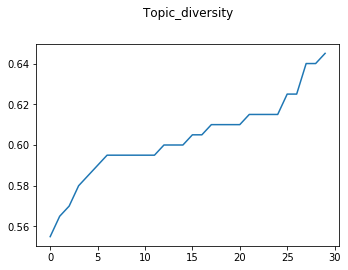

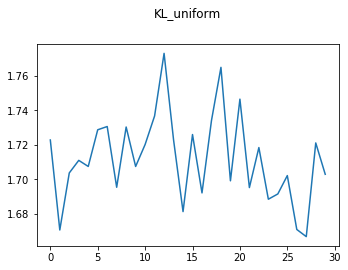

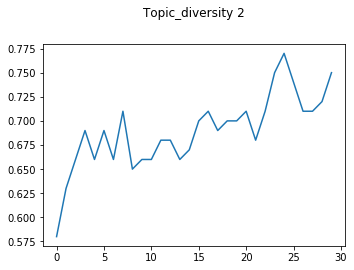

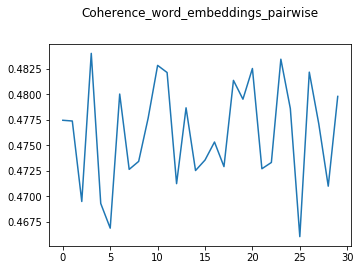

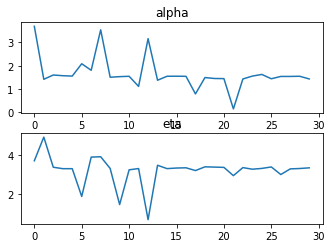

In [10]:
# Plot data
res.plot_all(metric="Topic_diversity")